# Exploratory Data Analysis



## Dataset 

Dataset yang digunakan adalah dataset asli *open-source* yang disediakan oleh Kaggle, dengan deskripsi sebagai berikut:

* **Nama Dataset :** Metro Interstate Traffic Dataset
* **Deskripsi :** This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.

* **Daftar Atribut**

| Atribut | Deskripsi|
|:---|:---|
| holiday | a categorical variable that indicates whether the date is a US national holiday or a regional holiday (such as the Minnesota State Fair). |
| temp | a numeric variable that shows the average temperature in kelvin. |
| rain_1h | a numeric variable that shows the amount of rain in mm that occurred in the hour. |
| snow_1h | a numeric variable that shows the amount of snow in mm that occurred in the hour. |
| clouds_all | a numeric variable that shows the percentage of cloud cover. |
| weather_main | a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.). |
| weather_description | a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.). |
| date_time | a datetime variable that shows the hour of the data collected in local CST time. |
| traffic_volume | a numeric variable that shows the hourly I-94 reported westbound traffic volume. |

* **Jumlah kolom :** 9
* **Jumlah baris :** 48.204

* **Sumber :** https://www.kaggle.com/datasets/anshtanwar/metro-interstate-traffic-volume

## Tujuan Analisis

Mencari atribut atau variabel apa saja yang mempengaruhi volume lalu lintas di jalan raya antar negara bagian utama di US yang menghubungkan Minneapolis dan St Paul, Minnesota.

## 1.  Memahami Dataset

### a. Memuat Dataset

Dataset berbentuk CSV, diimport menggunakan library Pandas dengan bahasa pemrograman Python.

In [1]:
# import library 
import pandas as pd

# load dataset 
traffic_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

### b. Menampilkan Dataset

Melihat beberapa baris data untuk memahami struktur dan formatnya secara sekilas.

In [2]:
# menampilkan dataset
traffic_df

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00
...,...,...,...,...,...,...,...,...,...
48199,3543,None,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00
48200,2781,None,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00
48201,2159,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00
48202,1450,None,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00


Terlihat bahwa dataset memang terdiri dari **48.204 baris** dan **9 kolom**.

In [3]:
# hanya menampilkan 5 sampel data teratas
traffic_df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


### c. Mengidentifikasi Atribut 

Mengidentifikasi jenis-jenis atribut pada data, tipe data setiap atribut, dan arti dari setiap atribut.

In [4]:
# list nama atribut
traffic_df.columns.values.tolist()

['traffic_volume',
 'holiday',
 'temp',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'weather_main',
 'weather_description',
 'date_time']

In [5]:
# identifikasi tipe data setiap atribut
traffic_df.dtypes

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object

Berikut adalah deskripsi atribut/kolom yang kita dapat dari Kaggle:

| Atribut | Deskripsi |
|:--------|:----------|
| traffic_volume | Variabel numerik yang menunjukkan volume lalu lintas I-94 yang dilaporkan ke barat setiap jam. |
| holiday | Variabel kategorikal yang menunjukkan apakah tanggal tersebut adalah hari libur nasional Amerika Serikat atau hari libur regional (seperti Pameran Negara Bagian Minnesota). |
| temp | Variabel numerik yang menunjukkan suhu rata-rata dalam kelvin. |
| rain_1h | Variabel numerik yang menunjukkan jumlah hujan dalam mm yang terjadi dalam satu jam. |
| snow_1h | Variabel numerik yang menunjukkan jumlah salju dalam mm yang terjadi dalam satu jam. |
| clouds_all | Variabel numerik yang menunjukkan persentase tutupan awan. |
| weather_main | Variabel kategorikal yang memberikan deskripsi tekstual singkat dari kondisi cuaca saat ini (seperti Cerah, Berawan, Hujan, dll.). |
| weather_description | Variabel kategorikal yang memberikan deskripsi tekstual lebih panjang tentang kondisi cuaca saat ini (seperti hujan ringan, awan mendung, dll.). |
| date_time | Variabel datetime yang menunjukkan jam pengumpulan data dalam waktu lokal CST. |

Terdapat beberapa atribut yang mungkin saja dapat mempengaruhi volume lalu lintas jalan, yaitu:
* Hari libur nasional
* Suhu
* Hujan
* Salju
* Presentase berawan
* Cuaca
* Waktu

Kita harus mengidentifikasi atribut satu per-satu.

### 1) Hari Libur Nasional

Atribut "holiday" berisi data dengan tipe data **object** atau **string** atau karakter. Sehingga, kita identifikasi lihat nilai apa saja sih yang dimiliki oleh atribut ini.

In [6]:
# cek semua nilai yang berbeda dalam kolom "holiday"
traffic_df['holiday'].unique().tolist()

['None',
 'Columbus Day',
 'Veterans Day',
 'Thanksgiving Day',
 'Christmas Day',
 'New Years Day',
 'Washingtons Birthday',
 'Memorial Day',
 'Independence Day',
 'State Fair',
 'Labor Day',
 'Martin Luther King Jr Day']

Ternyata, ada nilai "None" pada atribut "holiday", yang artinya "tidak ada hari libur" atau "hari kerja". Untuk ke depannya kita perlu melakukan pre-processing pada atribut ini. 

### 2) Suhu, Hujan, Salju

Atribut "temp", "rain", dan "snow" berisi data dengan tipe data **float** atau bilangan pecahan. Kita tidak perlu mengetahui nilai distinct-nya karena hasilnya pasti banyak sekali. Kita hanya perlu mencari apakah atribut ini memiliki nilai yang "aneh".

In [7]:
# cek apakah ada nilai null
traffic_df['temp'].isnull().values.any()

False

In [8]:
# cek apakah ada nilai null
traffic_df['rain_1h'].isnull().values.any()

False

In [9]:
# cek apakah ada nilai null
traffic_df['snow_1h'].isnull().values.any()

False

Tidak ada nilai "null", artinya atribut-atribut ini cukup baik, tidak perlu melalui pre-processing.

### 3) Presentase Berawan

Atribut "clouds" berisi data dengan tipe data **int** atau bilangan bulat. Kita tidak perlu mengetahui nilai distinct-nya karena hasilnya pasti banyak sekali. Kita hanya perlu mencari apakah atribut ini memiliki nilai yang "aneh".

In [10]:
# cek apakah ada nilai null
traffic_df['clouds_all'].isnull().values.any()

False

Tidak ada nilai "null", artinya atribut ini cukup baik, tidak perlu melalui pre-processing.

### 4) Cuaca

Atribut "weather" berisi data dengan tipe data **object** atau **string** atau karakter. Atribut ini terdiri dari 2 kolom, yaitu "weather_main" dan "weather_description" yang sepertinya saling berhubungan. Kita harus cek lagi.

In [11]:
# cek semua nilai yang berbeda dalam kolom "weather_main"
traffic_df['weather_main'].unique().tolist()

['Clouds',
 'Clear',
 'Rain',
 'Drizzle',
 'Mist',
 'Haze',
 'Fog',
 'Thunderstorm',
 'Snow',
 'Squall',
 'Smoke']

In [12]:
# cek semua nilai yang berbeda dalam kolom "weather_description"
traffic_df['weather_description'].unique().tolist()

['scattered clouds',
 'broken clouds',
 'overcast clouds',
 'sky is clear',
 'few clouds',
 'light rain',
 'light intensity drizzle',
 'mist',
 'haze',
 'fog',
 'proximity shower rain',
 'drizzle',
 'moderate rain',
 'heavy intensity rain',
 'proximity thunderstorm',
 'thunderstorm with light rain',
 'proximity thunderstorm with rain',
 'heavy snow',
 'heavy intensity drizzle',
 'snow',
 'thunderstorm with heavy rain',
 'freezing rain',
 'shower snow',
 'light rain and snow',
 'light intensity shower rain',
 'SQUALLS',
 'thunderstorm with rain',
 'proximity thunderstorm with drizzle',
 'thunderstorm',
 'Sky is Clear',
 'very heavy rain',
 'thunderstorm with light drizzle',
 'light snow',
 'thunderstorm with drizzle',
 'smoke',
 'shower drizzle',
 'light shower snow',
 'sleet']

In [13]:
import pprint

# function to get unique values
def unique(mylist):
    unique_list = []
    for x in mylist:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    pprint.pprint(unique_list)

In [14]:
# cek semua pasangan yang berbeda pada kolom "weather_main" dan "weather_description"
unique(list(zip(traffic_df['weather_main'],traffic_df['weather_description'])))

[('Clouds', 'scattered clouds'),
 ('Clouds', 'broken clouds'),
 ('Clouds', 'overcast clouds'),
 ('Clear', 'sky is clear'),
 ('Clouds', 'few clouds'),
 ('Rain', 'light rain'),
 ('Drizzle', 'light intensity drizzle'),
 ('Mist', 'mist'),
 ('Haze', 'haze'),
 ('Fog', 'fog'),
 ('Rain', 'proximity shower rain'),
 ('Drizzle', 'drizzle'),
 ('Rain', 'moderate rain'),
 ('Rain', 'heavy intensity rain'),
 ('Thunderstorm', 'proximity thunderstorm'),
 ('Thunderstorm', 'thunderstorm with light rain'),
 ('Thunderstorm', 'proximity thunderstorm with rain'),
 ('Snow', 'heavy snow'),
 ('Drizzle', 'heavy intensity drizzle'),
 ('Snow', 'snow'),
 ('Thunderstorm', 'thunderstorm with heavy rain'),
 ('Rain', 'freezing rain'),
 ('Snow', 'shower snow'),
 ('Snow', 'light rain and snow'),
 ('Rain', 'light intensity shower rain'),
 ('Squall', 'SQUALLS'),
 ('Thunderstorm', 'thunderstorm with rain'),
 ('Thunderstorm', 'proximity thunderstorm with drizzle'),
 ('Thunderstorm', 'thunderstorm'),
 ('Clear', 'Sky is Clear')

Tidak ada nilai "null" atau "None", artinya 2 atribut ini cukup baik, tidak perlu melalui pre-processing.

### 5) Waktu

Atribut "date_time" berisi data dengan tipe data **object** atau **string** atau karakter. 

In [15]:
# cek apakah ada nilai null
traffic_df['date_time'].isnull().values.any()

False

Tidak ada "null" pada atribut ini, namun atribut ini tidak berarti apa-apa jika masih dalam bentuk tipe data object. Diperlukan pre-processing untuk mengolah dan menggunakan atribut ini lebih jauh.

## 2. Statistik Deskriptif

Statistik deskriptif ada 2, untuk melihat pemusatan data dan penyebaran data.
* **Pemusatan data**: Mean, median, modus
* **Penyebaran data**: Varian, standar deviasi

Kita bisa menggunakan fungsi yang telah disediakan Pandas yaitu **describe()** untuk mendapatkan nilai mean, std, max, min, dan kuartil secara cepat.

In [16]:
traffic_df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231
std,1986.860670,13.338232,44.789133,0.008168,39.015750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000


Kita juga bisa eksplor lebih lanjut menggunakan cara-cara yang telah dijelaskan pada Modul 1.1 dan Modul 1.2. Supaya mendapatkan pemahaman yang lebih detail. Untuk mempersingkat, kita bisa membuat code Python ([statistics_descriptive.py](statistics_descriptive.py)) yang kemudian kita import fungsi-fungsinya disini.

In [25]:
# import dari py yang kita bikin sendiri (harus satu direktori)
import statistics_descriptive as sd

### 1) Volume Lalu Lintas

Mean: 3259.8183553232097


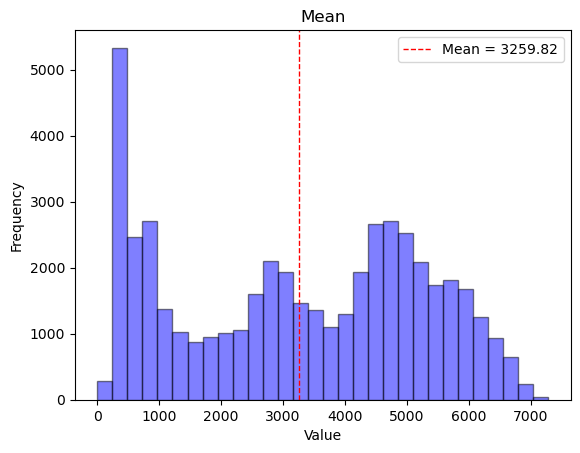

In [18]:
sd.visualize_mean(traffic_df['traffic_volume'])

Median: 3380.0


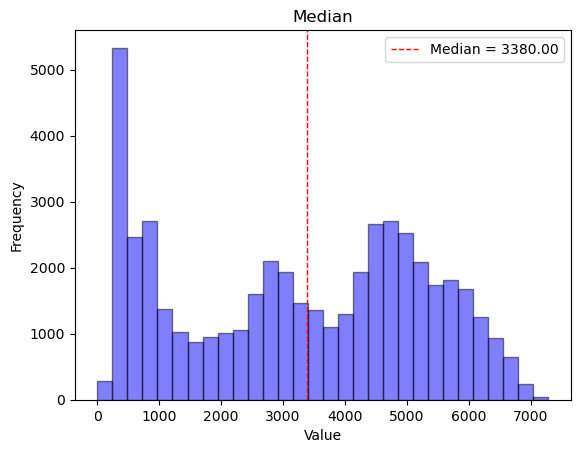

In [19]:
sd.visualize_median(traffic_df['traffic_volume'])

Modus: [353, 356]


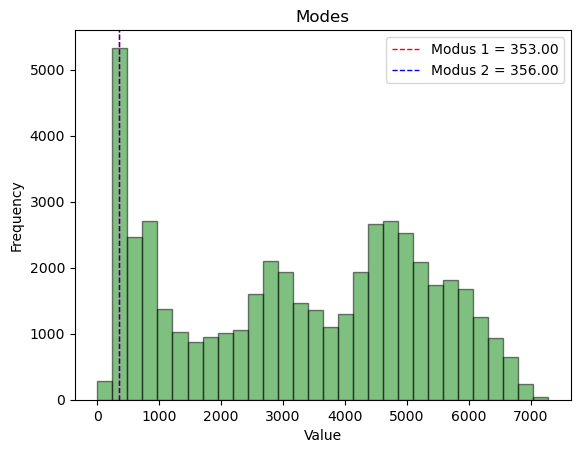

In [20]:
sd.visualize_modus(traffic_df['traffic_volume'])

Mean dan mediannya hampir sama, yaitu 3259.8 dan 3380, artinya distribusi data simetris dan tidak terpengaruh oleh outliers. Sedangkan modusnya adalah 353 dan 356, dimana jauh dari mean dan median, artinya distribusi data tidak normal dan bimodal (karena ada dua mouds, meskipun hampir sama).

Range: 7280 - 0 = 7280


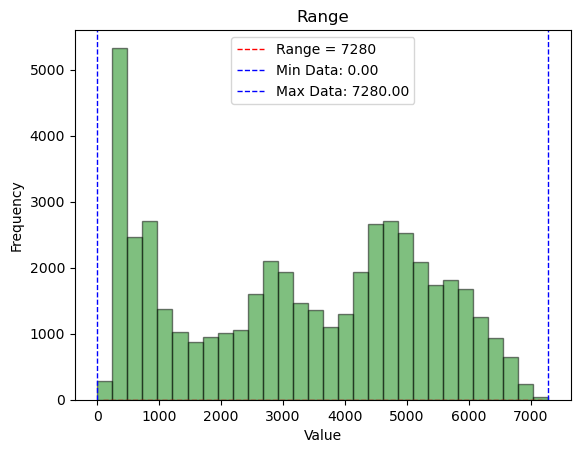

In [23]:
sd.visualize_range(traffic_df['traffic_volume'])

Mean: 3259.8183553232097
Mean: 3259.8183553232097
Variansi: 190286901451.51852 / 48204 = 3947533.429829859
Standard Deviation: 3947533.429829859**0.5 = 1986.8400614618831


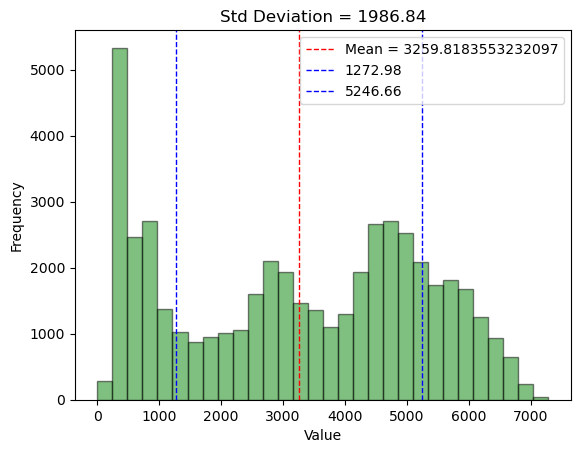

In [24]:
sd.visualize_std(traffic_df['traffic_volume'])

In [22]:
# Convert datetime menjadi tipe data pandas datetime
traffic_df['date_time'] = pandas.to_datetime(traffic_volume_dataset['date_time'])

NameError: name 'pandas' is not defined

In [ ]:
traffic_df.describe()

In [ ]:
traffic_volume_dataset

In [ ]:
# Extract additional time-based columns for analysis
traffic_volume_dataset['hour'] = traffic_volume_dataset['date_time'].dt.hour
traffic_volume_dataset['day'] = traffic_volume_dataset['date_time'].dt.day
traffic_volume_dataset['month'] = traffic_volume_dataset['date_time'].dt.month
traffic_volume_dataset['year'] = traffic_volume_dataset['date_time'].dt.year

In [ ]:
traffic_volume_dataset

In [ ]:
# cek tipedata setiap kolom
traffic_volume_dataset.dtypes